<a href="https://colab.research.google.com/github/Mohanapriya2210/DataScience.github/blob/main/Heart_stroke__prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/heart.csv",na_values=['?'], low_memory = False)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.shape

(303, 14)

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df['age'].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77])

In [6]:
df['sex'].unique()

array([1, 0])

In [7]:
df['fbs'].unique()

array([1, 0])

In [8]:
df['chol'].unique()

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197,
       198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321,
       325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303,
       265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240,
       318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315,
       246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268,
       267, 210, 295, 306, 178, 242, 180, 228, 149, 278, 253, 342, 157,
       286, 229, 284, 224, 206, 167, 230, 335, 276, 353, 225, 330, 290,
       172, 305, 188, 282, 185, 326, 274, 164, 307, 249, 341, 407, 217,
       174, 281, 289, 322, 299, 300, 293, 184, 409, 259, 200, 327, 237,
       218, 319, 166, 311, 169, 187, 176, 241, 131])

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
df.shape

(303, 14)

In [13]:
df.drop(columns=['ca'],inplace=True)

In [14]:
df.shape

(303, 13)

In [15]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [16]:
df.skew()

,0
age,-0.202463
sex,-0.791335
cp,0.484732
trestbps,0.713768
chol,1.143401
fbs,1.986652
restecg,0.162522
thalach,-0.537410
exang,0.742532
oldpeak,1.269720


In [17]:
df['thalach'] = df['thalach'].fillna(df['thalach'].mean())


In [18]:
df.fillna(df.median(),inplace=True)

In [19]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [20]:
df.duplicated().sum()

np.int64(1)

In [21]:
df.drop_duplicates(inplace=True)

In [22]:
df.shape

(302, 13)

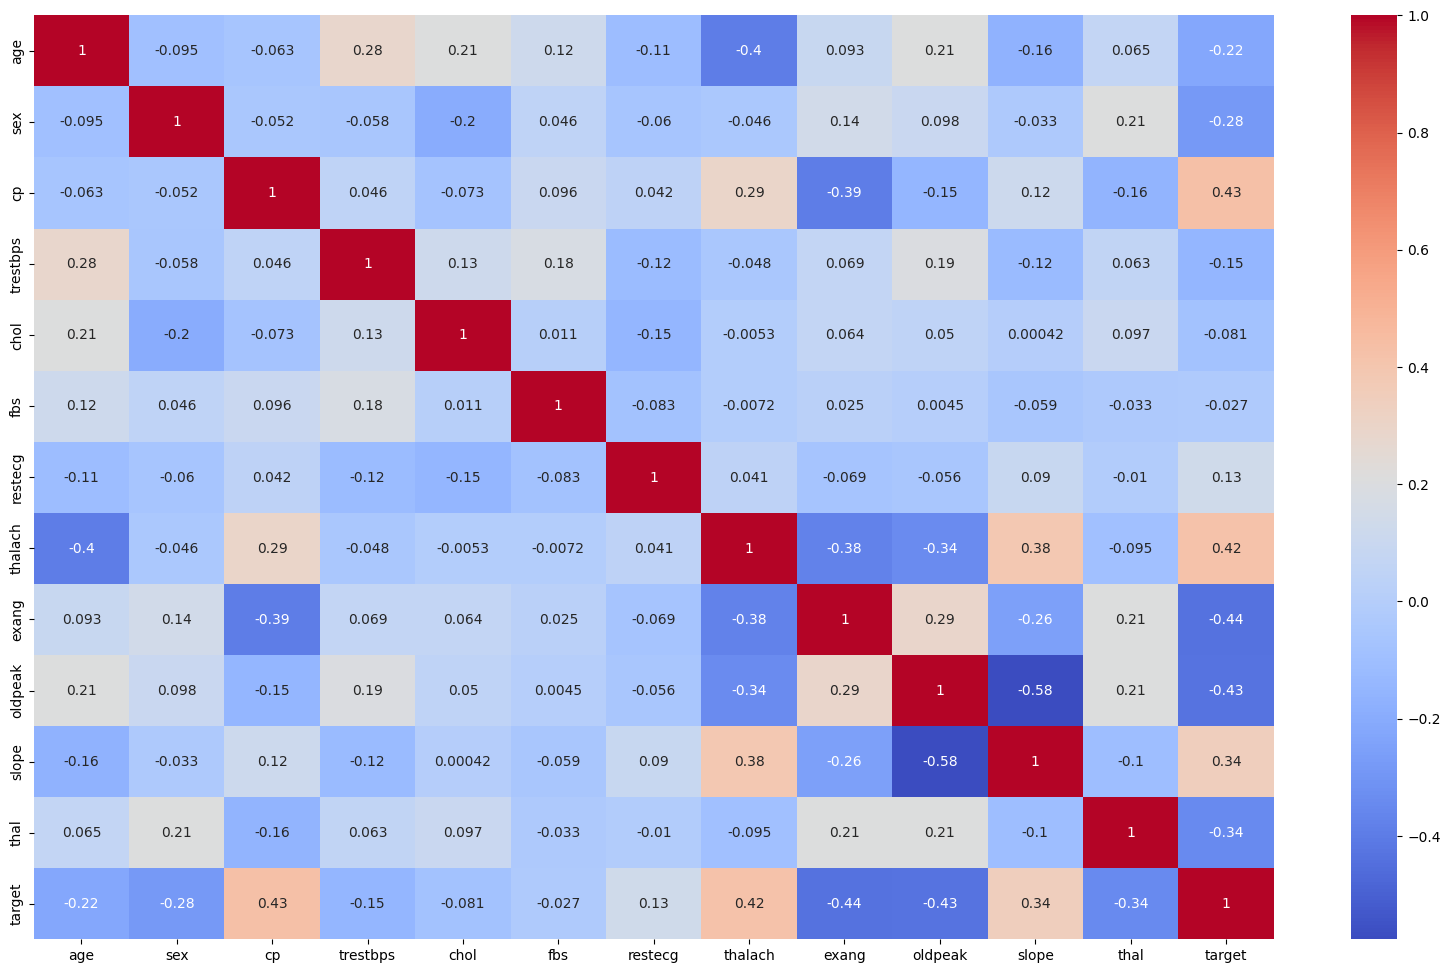

In [23]:
cor=df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

In [24]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'thal', 'target'],
      dtype='object')

In [25]:
df=df.rename(columns={"target       ":"target"})

In [26]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'thal', 'target'],
      dtype='object')

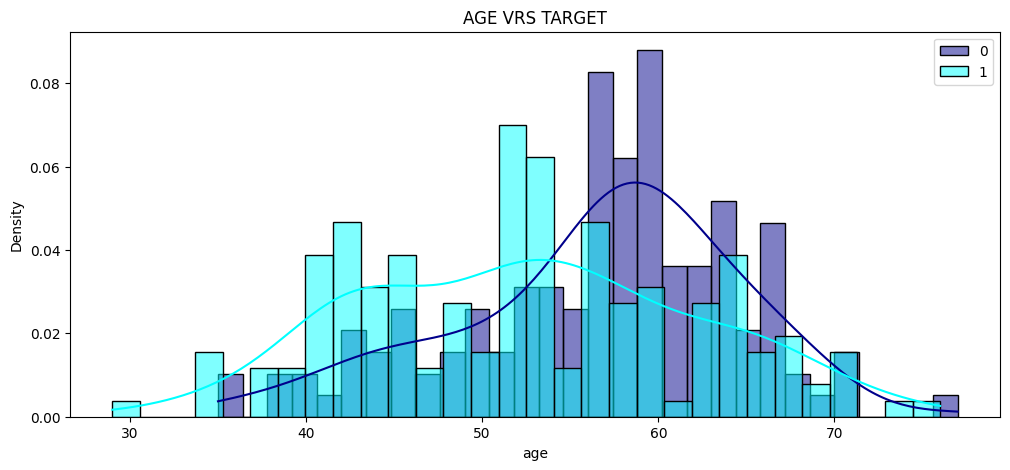

In [27]:
plt.figure(figsize=(12, 5))
plt.title("AGE VRS TARGET")

# Histogram + KDE for target = 0
sns.histplot(df.age[df.target == 0], color="darkblue", kde=True, stat="density", bins=30, label='0', alpha=0.5)

# Histogram + KDE for target = 1
sns.histplot(df.age[df.target == 1], color="cyan", kde=True, stat="density", bins=30, label='1', alpha=0.5)

plt.legend()
plt.xlabel("age")
plt.ylabel("Density")
plt.show()

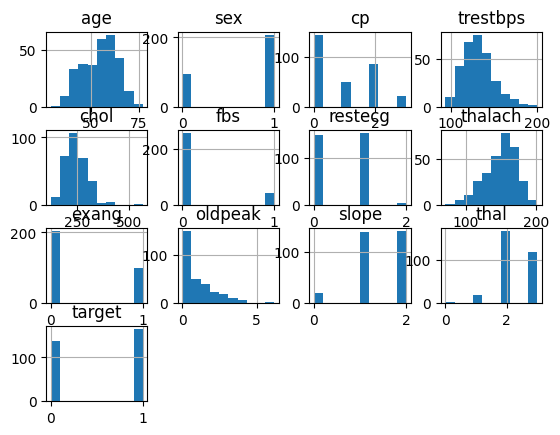

<Figure size 2000x1200 with 0 Axes>

In [28]:
df.hist()
plt.figure(figsize=(20,12))
plt.show()


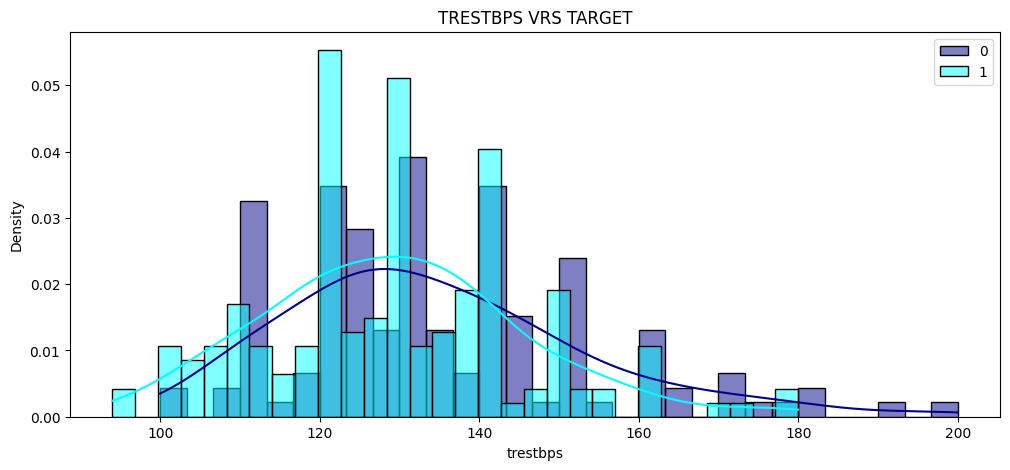

In [29]:
plt.figure(figsize=(12, 5))
plt.title("TRESTBPS VRS TARGET")
sns.histplot(df.trestbps[df.target == 0], color="darkblue", kde=True, stat="density", bins=30, label='0', alpha=0.5)
sns.histplot(df.trestbps[df.target == 1], color="cyan", kde=True, stat="density", bins=30, label='1', alpha=0.5)
plt.legend()
plt.xlabel("trestbps")
plt.ylabel("Density")
plt.show()


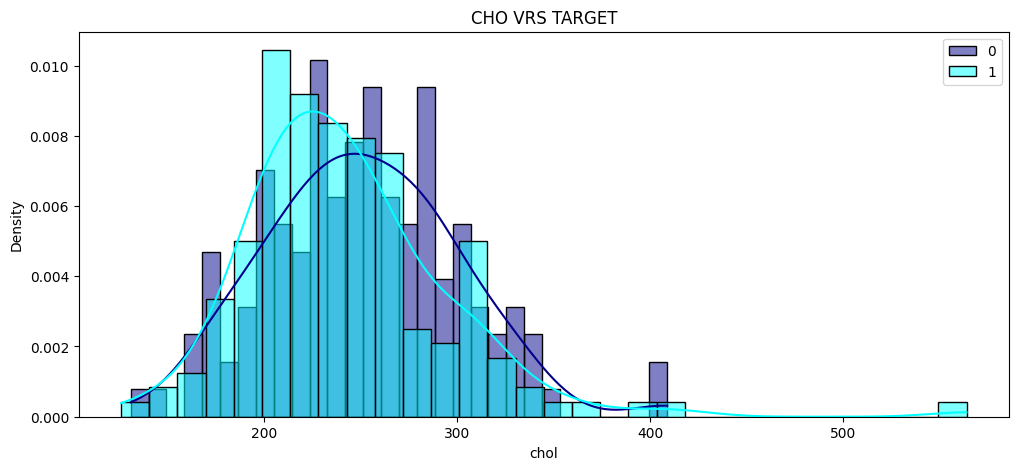

In [30]:
plt.figure(figsize=(12, 5))
plt.title("CHO VRS TARGET")
sns.histplot(df.chol[df.target == 0], color="darkblue", kde=True, stat="density", bins=30, label='0', alpha=0.5)
sns.histplot(df.chol[df.target == 1], color="cyan", kde=True, stat="density", bins=30, label='1', alpha=0.5)
plt.legend()
plt.xlabel("chol")
plt.ylabel("Density")
plt.show()


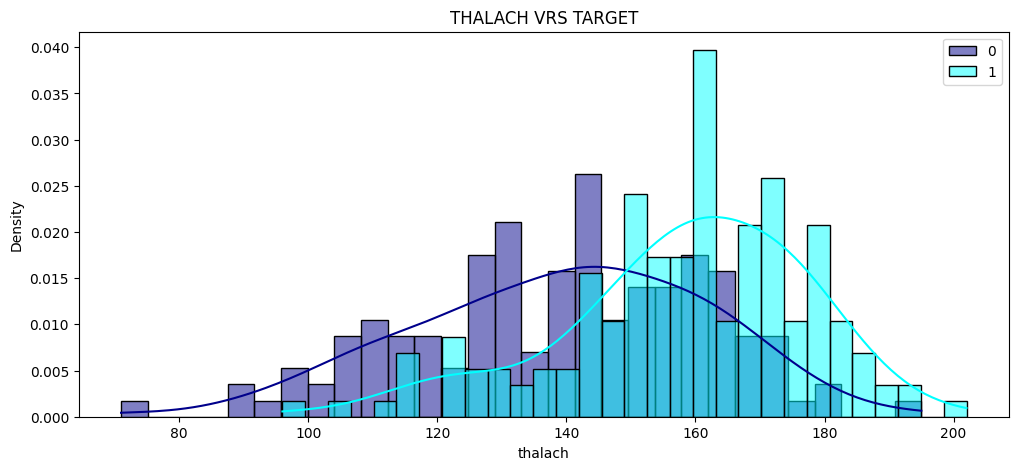

In [31]:
plt.figure(figsize=(12, 5))
plt.title("THALACH VRS TARGET")
sns.histplot(df.thalach[df.target == 0], color="darkblue", kde=True, stat="density", bins=30, label='0', alpha=0.5)
sns.histplot(df.thalach[df.target == 1], color="cyan", kde=True, stat="density", bins=30, label='1', alpha=0.5)
plt.legend()
plt.xlabel("thalach")
plt.ylabel("Density")
plt.show()

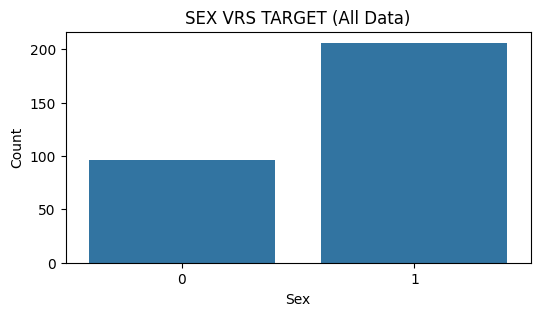

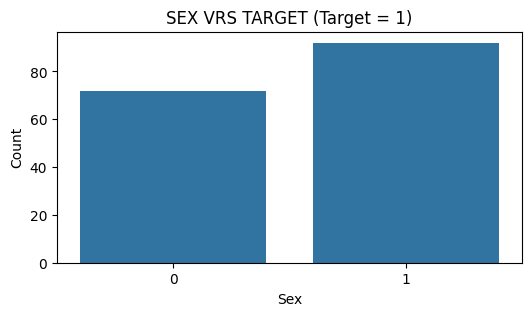

In [32]:
 # Plot 1: Overall distribution of sex
plt.figure(figsize=(6, 3))
plt.title("SEX VRS TARGET (All Data)")
sns.countplot(x='sex', data=df)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()
# Plot 2: Distribution of sex where target == 1
plt.figure(figsize=(6, 3))
plt.title("SEX VRS TARGET (Target = 1)")
sns.countplot(x='sex', data=df[df.target == 1])
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

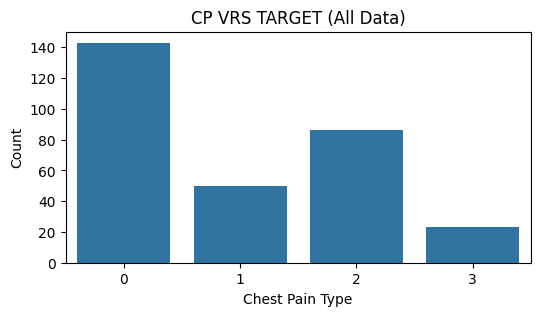

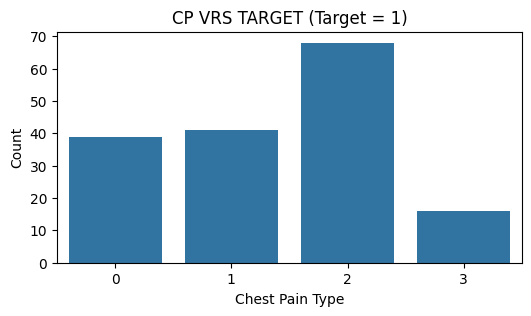

In [33]:



# Plot 1: Overall chest pain type distribution
plt.figure(figsize=(6, 3))
plt.title("CP VRS TARGET (All Data)")
sns.countplot(x='cp', data=df)
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.show()

# Plot 2: Chest pain type for patients with target = 1
plt.figure(figsize=(6, 3))
plt.title("CP VRS TARGET (Target = 1)")
sns.countplot(x='cp', data=df[df.target == 1])
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.show()


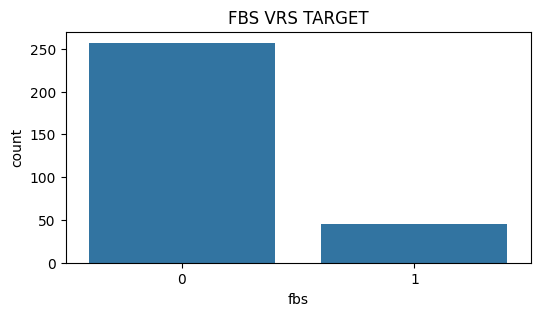

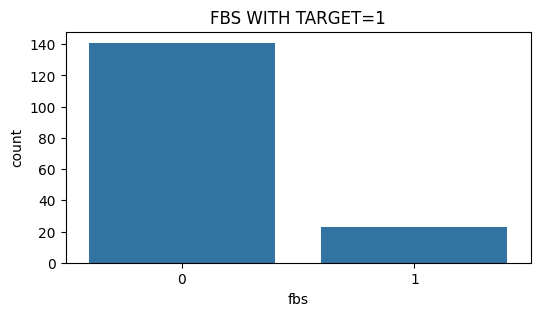

In [34]:
plt.figure(figsize=(6,3))
plt.title("FBS VRS TARGET")
sns.countplot(x='fbs', data=df)
plt.show()

plt.figure(figsize=(6,3))
plt.title("FBS WITH TARGET=1")
sns.countplot(x='fbs', data=df[df['target'] == 1])
plt.show()


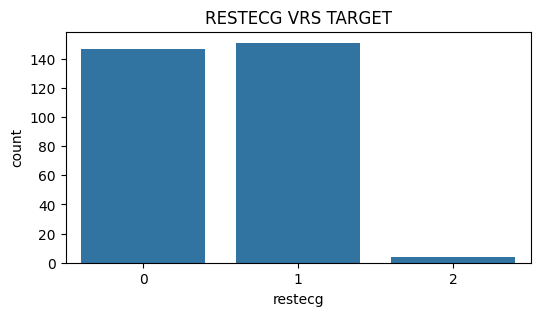

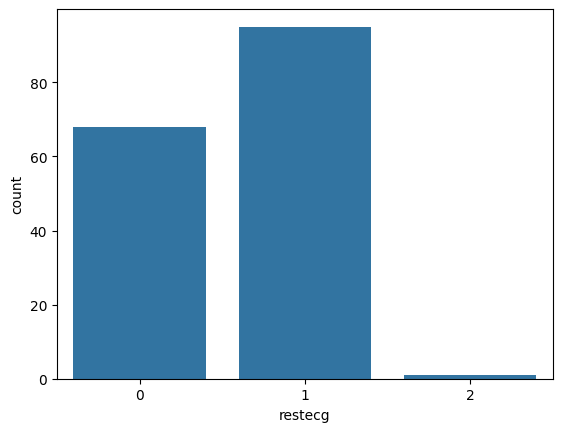

In [35]:
plt.figure(figsize=(6,3))
plt.title("RESTECG VRS TARGET")
sns.countplot(x='restecg', data=df)  # Use keyword arguments
plt.show()

sns.countplot(x='restecg', data=df[df['target'] == 1])  # Use keyword arguments and filtered dataframe
plt.show()

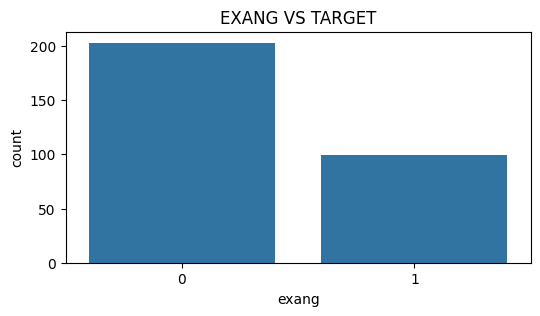

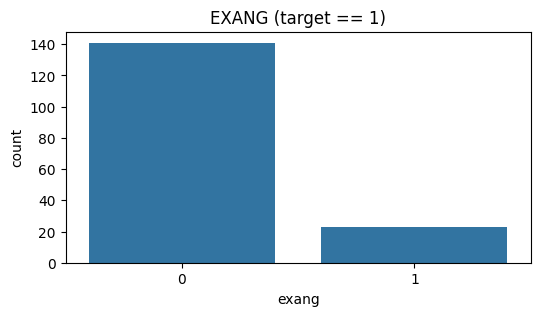

In [36]:
# Full EXANG distribution
plt.figure(figsize=(6,3))
plt.title("EXANG VS TARGET")
sns.countplot(x='exang', data=df)
plt.show()

# EXANG distribution for only those with target == 1
plt.figure(figsize=(6,3))
plt.title("EXANG (target == 1)")
sns.countplot(x='exang', data=df[df['target'] == 1])
plt.show()

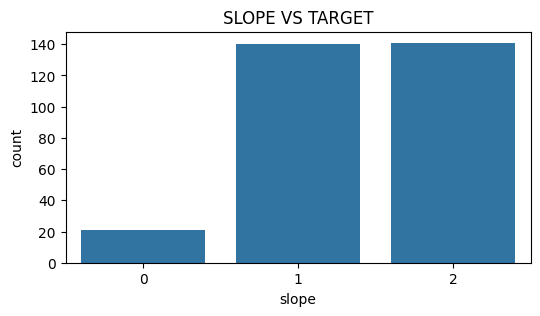

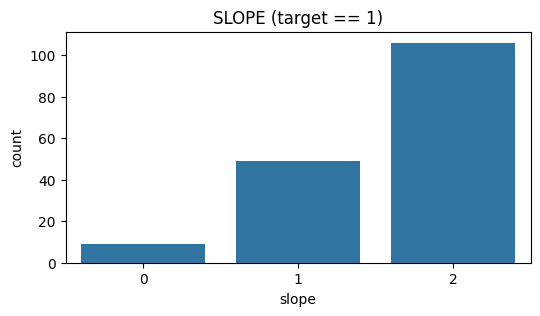

In [37]:
# Full distribution of slope
plt.figure(figsize=(6,3))
plt.title("SLOPE VS TARGET")
sns.countplot(x='slope', data=df)
plt.show()

# Distribution of slope when target == 1
plt.figure(figsize=(6,3))
plt.title("SLOPE (target == 1)")
sns.countplot(x='slope', data=df[df['target'] == 1])
plt.show()

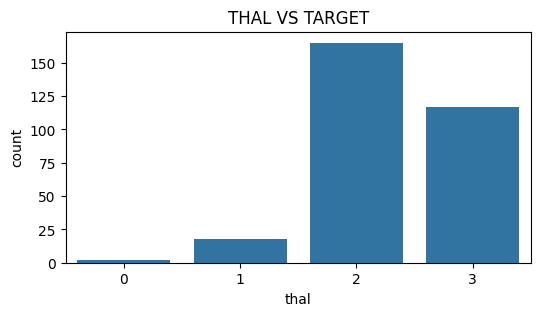

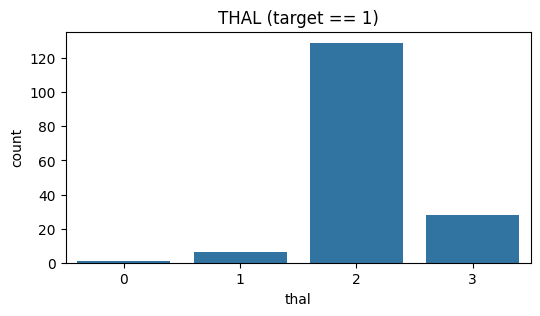

In [38]:
# Full distribution of 'thal'
plt.figure(figsize=(6,3))
plt.title("THAL VS TARGET")
sns.countplot(x='thal', data=df)
plt.show()

# Distribution of 'thal' when target == 1
plt.figure(figsize=(6,3))
plt.title("THAL (target == 1)")
sns.countplot(x='thal', data=df[df['target'] == 1])
plt.show()

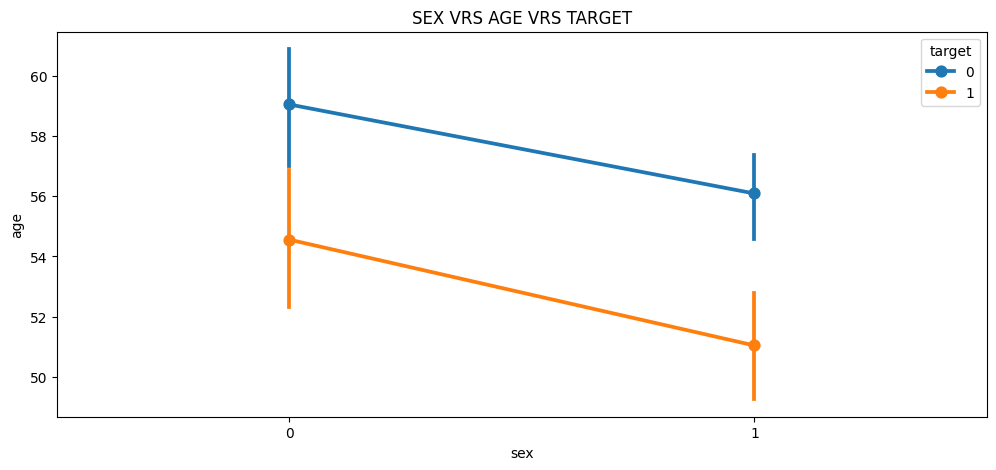

In [39]:
plt.figure(figsize=(12,5))
plt.title("SEX VRS AGE VRS TARGET")
sns.pointplot(x = 'sex',y='age',hue='target',data=df)
plt.show()


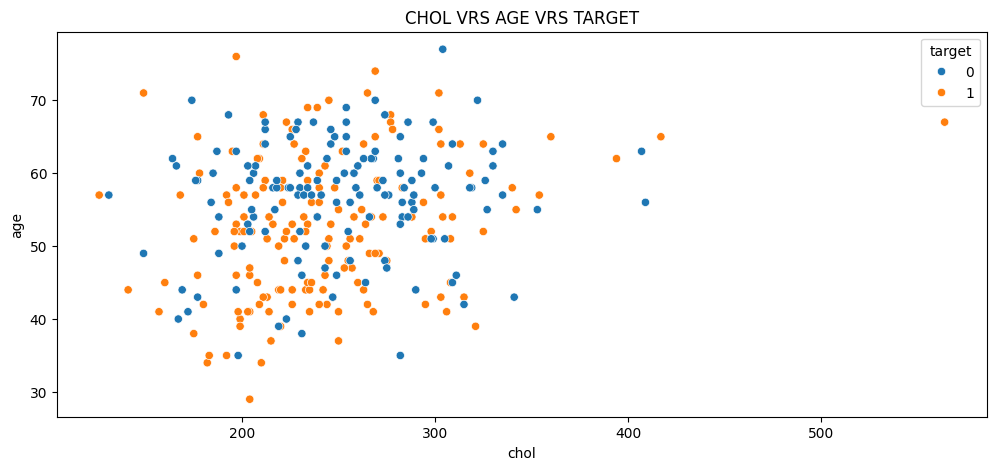

In [40]:
plt.figure(figsize=(12,5))
plt.title("CHOL VRS AGE VRS TARGET")
sns.scatterplot(x='chol',y='age',hue='target',data=df)
plt.show()

In [41]:
x=df[['age', 'sex', 'cp','trestbps', 'chol', 'fbs','restecg', 'thalach', 'exang', 'oldpeak', 'slope','thal']]
y=df['target']
print(x)
print(y)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  thal  
0        0     1  
1        0     2  
2        2     2  
3        2 

In [42]:
# split data into train and test
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts = train_test_split(x,y,test_size=0.2)
# we have to split the data into 80% as train and 20% as test so we have specified test_size as 0.2
print(x.shape)
print(xtr.shape)
print(xts.shape)
print(y.shape)
print(ytr.shape)
print(yts.shape)


(302, 12)
(241, 12)
(61, 12)
(302,)
(241,)
(61,)


In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
xtr = pca.fit_transform(xtr)
xts = pca.transform(xts)
explained_variance = pca.explained_variance_ratio_

In [44]:
from sklearn.svm import SVC

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
svc_model=SVC()

In [47]:
svc_model.fit(xtr,ytr)

SVC()

In [48]:
y_pred=svc_model.predict(xts)

In [49]:
cm=confusion_matrix(yts,y_pred)

<Axes: >

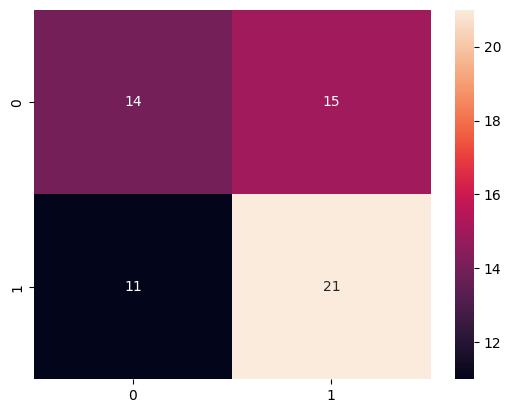

In [50]:
sns.heatmap(cm,annot=True)

In [51]:
min_train = xtr.min()
min_train

np.float64(-118.53382940758544)

In [52]:
range_train = (xtr - min_train).max()
range_train

np.float64(436.4620572200005)

In [53]:
X_train_scaled = (xtr - min_train)/range_train
X_train_scaled

array([[0.37283881],
       [0.17783269],
       [0.03022444],
       [0.30147373],
       [0.19763912],
       [0.23264164],
       [0.27623069],
       [0.41333158],
       [0.26593058],
       [0.27862886],
       [0.29495882],
       [0.19985644],
       [0.29942544],
       [0.08778001],
       [0.20827415],
       [0.44601487],
       [0.22739063],
       [0.19529874],
       [0.25473867],
       [0.27443661],
       [0.21550164],
       [0.21082635],
       [0.30365393],
       [0.17907259],
       [0.2580156 ],
       [0.21450595],
       [0.11457632],
       [0.1149391 ],
       [0.14735501],
       [0.31822565],
       [0.22549027],
       [1.        ],
       [0.10061178],
       [0.04818262],
       [0.19438979],
       [0.27364518],
       [0.32087888],
       [0.61244517],
       [0.40865443],
       [0.5167446 ],
       [0.29220336],
       [0.4654926 ],
       [0.38189779],
       [0.27988577],
       [0.45767348],
       [0.29263066],
       [0.27282022],
       [0.165

In [54]:
min_test = xts.min()
range_test = (xts - min_test).max()
X_test_scaled = (xts - min_test)/range_test

In [55]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [56]:
svc_model = SVC()
svc_model.fit(X_train_scaled, ytr)

SVC()

<Axes: >

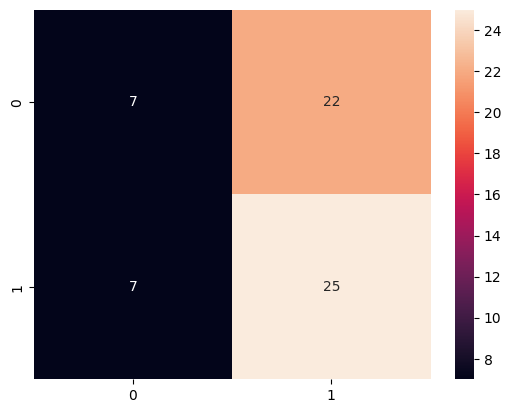

In [57]:
y_predict = svc_model.predict(X_test_scaled)
cm = confusion_matrix(yts, y_predict)
sns.heatmap(cm,annot=True,fmt="d")


In [58]:
print(classification_report(yts,y_predict))

              precision    recall  f1-score   support

           0       0.50      0.24      0.33        29
           1       0.53      0.78      0.63        32

    accuracy                           0.52        61
   macro avg       0.52      0.51      0.48        61
weighted avg       0.52      0.52      0.49        61



In [59]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}


In [60]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(X_train_scaled,ytr)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.551 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.542 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.542 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.542 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.551 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.542 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.542 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.542 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.551 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [61]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [62]:
grid.best_estimator_

SVC(C=0.1, gamma=1)

<Axes: >

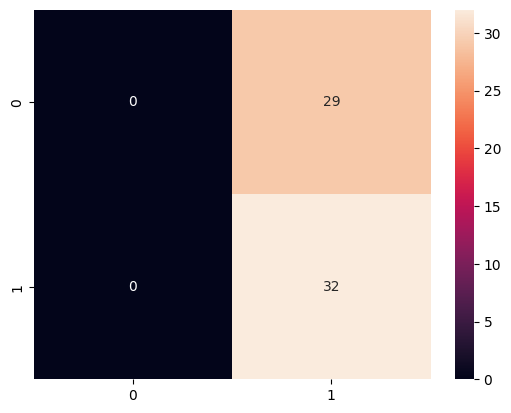

In [63]:
grid_predictions = grid.predict(X_test_scaled)
cm = confusion_matrix(yts, grid_predictions)
sns.heatmap(cm, annot=True)

In [64]:
print(classification_report(yts,grid_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.52      1.00      0.69        32

    accuracy                           0.52        61
   macro avg       0.26      0.50      0.34        61
weighted avg       0.28      0.52      0.36        61



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [65]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)

In [66]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = xtr, y = ytr, cv = 10)
accuracies

array([0.6       , 0.375     , 0.54166667, 0.54166667, 0.54166667,
       0.45833333, 0.66666667, 0.54166667, 0.58333333, 0.58333333])

In [67]:
print(accuracies.mean())
print(accuracies.std())

0.5433333333333332
0.07562700869692286
